In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
print("The modules are imported")

The modules are imported


In [250]:
class project():
    def __init__(self):
        print("Project initialized. Ready to load data........")
    
    def salesyearwise(Global_Sales,year):
        return pd.read_csv("vgsales.csv")
    
    def Global_Sales(self):
        return pd.read_csv("vgsales.csv")
    
class Sales:
    def __init__(self,America):
        self.America=America
    def SalesAmerica(self):
        count=0
        total=len(self.America)
        for i in range(len(self.America)):
            if self.America[i]>=5:
                count+=1
        return (count/total)

In [251]:
df = pd.read_csv("vgsales.csv")

In [252]:
Sales=Sales(df['NA_Sales'])
print(Sales.SalesAmerica())

0.003494396915290999


In [253]:
Aim = project()
salesyearwise = Aim.Global_Sales()

Project initialized. Ready to load data........


In [254]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Q1. Which region has performed the best in terms of sales?

In [255]:
x=(df['NA_Sales'].mean()*1000000)
y=(df['EU_Sales'].mean()*1000000)
z=(df['JP_Sales'].mean()*1000000)
q=(df['Other_Sales'].mean()*1000000)
p=(df['Global_Sales'].mean()*1000000)

print("The average sales in North America =", (f"${x:,.3f}")) #comma separated values till 3 decimal place and $ sign
print("The average sales in Europe =",(f"${y:,.3f}"))
print("The average sales in Japan =",(f"${z:,.3f}"))
print("The average sales in other regions =",(f"${q:,.3f}"))
print("The average sales globally =",(f"${p:,.3f}"))

The average sales in North America = $264,667.430
The average sales in Europe = $146,652.006
The average sales in Japan = $77,781.660
The average sales in other regions = $48,063.020
The average sales globally = $537,440.656


In [271]:
colors = ['lightslategray',] * 4
colors[1]='darkgray'
colors[2]='grey'
colors[3]='dimgrey'
colors[0] = 'crimson'

bar1 = go.Figure(data=[go.Bar(
    y=['Global','North America', 'Europe', 'Japan',
       'Other'],
    x=[537440.656,264667.430, 146652.006, 77781.660, 48063.020],
    orientation='h',
    marker_color=colors # marker color can be a single color value or an iterable
)])
bar1.update_layout(title_text='Region with highest sales on an average')
bar1.update_xaxes(title='Average Sales')
bar1.update_yaxes(title='Regions')

# Q2.  What are the top 10 games currently making the most sales globally?

In [272]:
top = pd.DataFrame(df.groupby("Name")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
top.head(10) #Printing the top 10 results

,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.37
7,Call of Duty: Black Ops,31.03
8,Call of Duty: Modern Warfare 3,30.83
9,New Super Mario Bros.,30.01


In [273]:
pie1 = px.pie(top, values=top['Global_Sales'][:10], names=top['Name'][:10],title='Top 10 games globally', 
              color_discrete_sequence=px.colors.sequential.Greens)
pie1.update_traces(textposition='inside', textinfo='percent+label',showlegend=False)

pie1.show()

# Q3. Are there any games with release year older than 2000 that are still making high sales?

In [274]:
old_games = pd.DataFrame(df.query('Year<2000', inplace=False))

In [275]:
import numpy as np #import library
a=old_games['Global_Sales']
np.percentile(a, [99]) 

old_games.query('Global_Sales>7.8235', inplace=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
30,31,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
46,47,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89


# Q4. What are the top gaming genres that are making high sales?

In [276]:
genre_df = df.groupby("Genre")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index()
genre_df

,Genre,Global_Sales
0,Action,1751.18
1,Sports,1330.93
2,Shooter,1037.37
3,Role-Playing,927.37
4,Platform,831.37
5,Misc,809.96
6,Racing,732.04
7,Fighting,448.91
8,Simulation,392.20
9,Puzzle,244.95


In [277]:
bar_genre= px.bar(genre_df, x='Genre', y='Global_Sales',color='Global_Sales',color_continuous_scale='rainbow')
bar_genre.show()

# Q5. Global sales above certain value 

In [263]:
Gsalecount=0
Gsale=df["Global_Sales"]

for x in Gsale:
    try:
        if x>30:
            Gsalecount+=1
    except:
        continue
print("Sales higher than the above taken value =", Gsalecount)

Sales higher than the above taken value = 7


# Q-6 which year has a very deep rise in sales ?

In [264]:
genre_df = df.groupby("Year")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index()
genre_df

,Year,Global_Sales
0,2008.0,678.90
1,2009.0,667.30
2,2007.0,611.13
3,2010.0,600.45
4,2006.0,521.04
5,2011.0,515.99
6,2005.0,459.94
7,2004.0,419.31
8,2002.0,395.52
9,2013.0,368.11


In [265]:
plot_genre= px.bar(genre_df, x='Year', y='Global_Sales',color='Global_Sales',color_continuous_scale='speed')
plot_genre.show()

# Q7. WHICH PUBLISHER HAS PUBLISHED GAMES MORE THAN 100

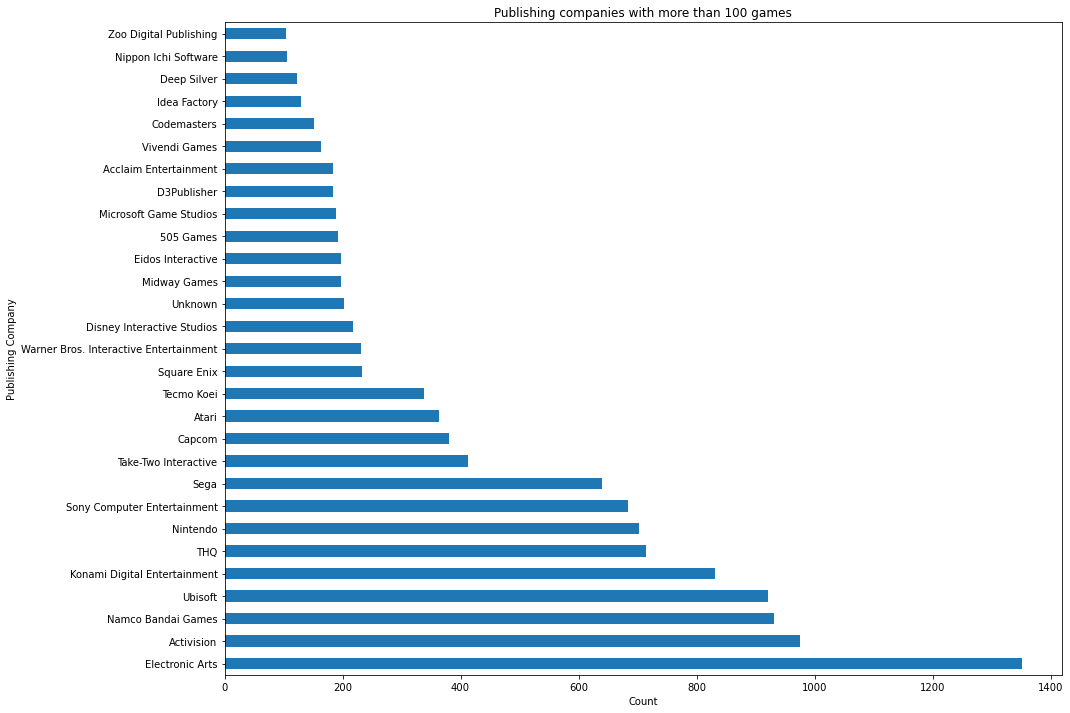

In [266]:
plt.figure(figsize=(15,12))
publishers = df.Publisher.value_counts()
publishers = publishers[publishers.values > 100]
publishers.plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel('Publishing Company')
plt.title('Publishing companies with more than 100 games')
plt.show()

# Q8.What are the 20 lowest grossing games?

In [267]:
top_twenty_lowest_grossing_games = df.sort_values(by = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"], ascending = True)
top_twenty_lowest_grossing_games.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.0,0.0,0.00,0.00,0.01
8055,8057,Summer Athletics: The Ultimate Challenge,PS2,2008.0,Sports,DTP Entertainment,0.0,0.0,0.00,0.18,0.18
15981,15984,Coven and Labyrinth of Refrain,PSV,2016.0,Action,Nippon Ichi Software,0.0,0.0,0.01,0.00,0.01
15982,15985,Super Battle For Money Sentouchuu: Kyuukyoku n...,3DS,2016.0,Action,Namco Bandai Games,0.0,0.0,0.01,0.00,0.01
15983,15986,Dragon Zakura DS,DS,2007.0,Misc,Electronic Arts,0.0,0.0,0.01,0.00,0.01
15986,15989,Sora no Otoshimono: DokiDoki Summer Vacation,PSP,2010.0,Adventure,Kadokawa Shoten,0.0,0.0,0.01,0.00,0.01
15989,15992,DokuSui: DokiDoki Suikoden,PSP,2011.0,Role-Playing,Irem Software Engineering,0.0,0.0,0.01,0.00,0.01
15990,15993,Shinseiki Evangelion: Battle Orchestra Portable,PSP,2009.0,Fighting,Broccoli,0.0,0.0,0.01,0.00,0.01
15992,15995,Bomberman (jp sales),PSP,2006.0,Puzzle,Konami Digital Entertainment,0.0,0.0,0.01,0.00,0.01
15993,15996,Blazblue: Continuum Shift Extend,PSP,2012.0,Fighting,Arc System Works,0.0,0.0,0.01,0.00,0.01


# Q9. What PC-FX games were sold?

In [268]:
df.query("Platform == 'PCFX'")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14556,14559,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,1996.0,Role-Playing,NEC,0.0,0.0,0.03,0.0,0.03


# Q10. Total Count of Games for each Platform

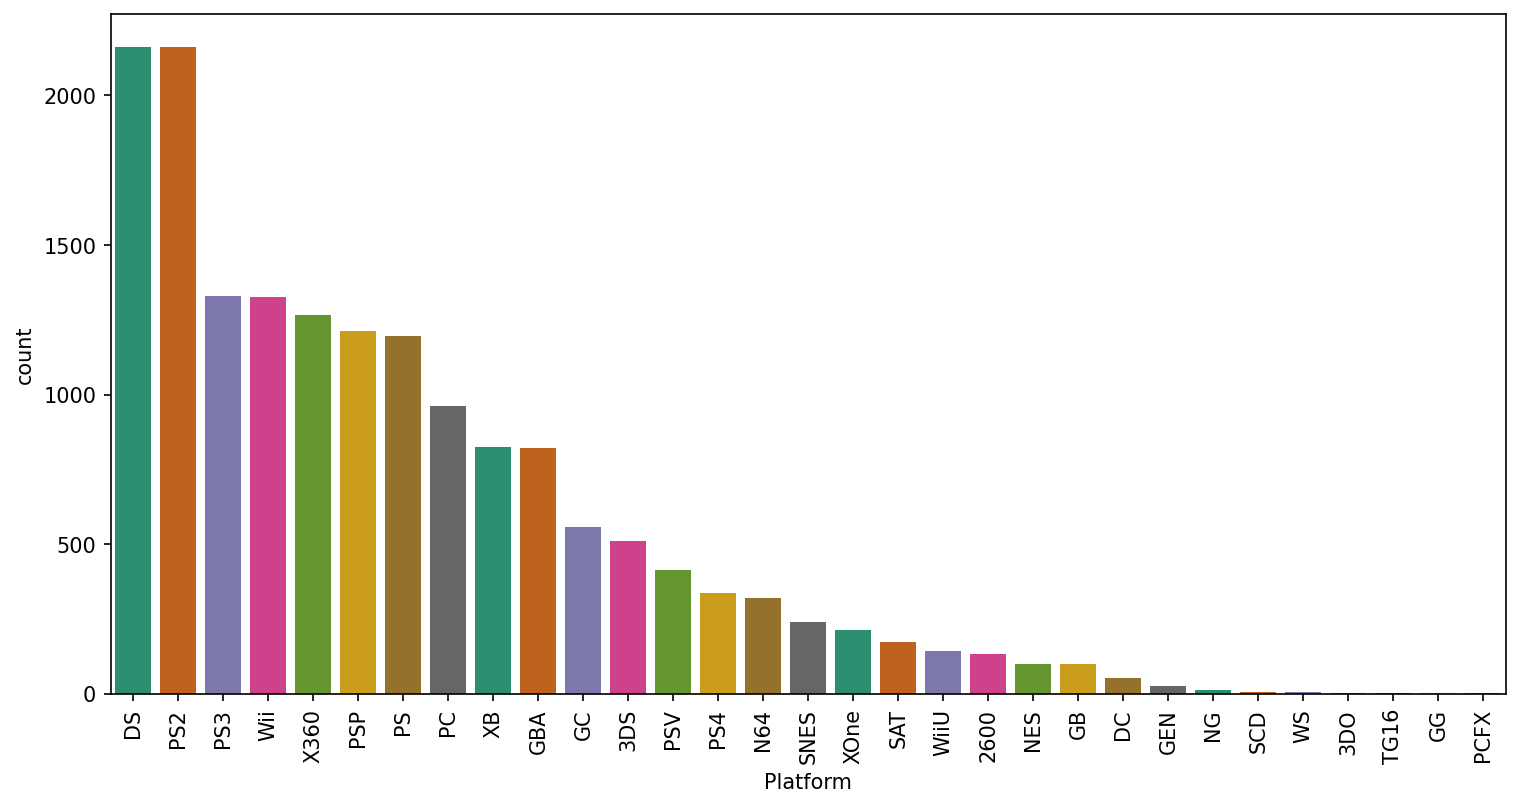

In [269]:
plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=df,
              x="Platform",
              order = df["Platform"].value_counts().index,
              palette="Dark2")
plt.xticks(rotation=90)
plt.show()

# Q11. Number of games released.

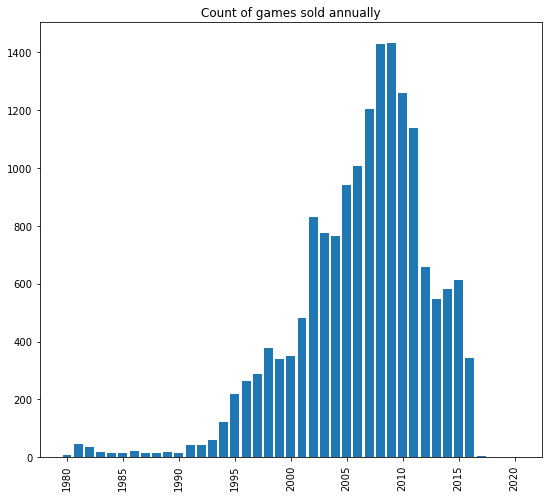

In [270]:
yearly_game = df.groupby('Year')['Name'].count().reset_index()
fig = plt.figure(figsize =(9, 8)) 
plt.bar(yearly_game['Year'], yearly_game['Name'])
plt.xticks(rotation=90)
plt.title('Count of games sold annually')
plt.show()